In [2]:
import csv
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.svm import SVC, LinearSVC
%matplotlib inline

In [5]:
#SVM with linear kernal
#加载数据1
data = sio.loadmat('.\data\ex6\ex6data1.mat')

In [6]:
# 提取特征x1 x2
X = data['X']
# 数据label (0=neg, 1=pos)
y = data['y'].ravel()

In [7]:
def plot_data(X, y):
    plt.plot(X[y == 0,0], X[y == 0,1], 'yo', label='neg')
    plt.plot(X[y == 1,0], X[y == 1,1], 'b+', label='pos')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(loc='lower left')
    
def plot_boundary(X, clf, level=0.0):
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
    h = 0.01
    grid_x1, grid_x2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                                   np.arange(x2_min, x2_max, h))
    grid_y = clf.predict(np.c_[grid_x1.ravel(), grid_x2.ravel()])
    grid_y = grid_y.reshape(grid_x1.shape)
    x1_extra = (x1_max - x1_min) / 50
    x2_extra = (x2_max - x2_min) / 50
    plt.xlim(x1_min - x1_extra, x1_max + x1_extra)
    plt.ylim(x2_min - x2_extra, x2_max + x2_extra)    
    plt.contour(grid_x1, grid_x2, grid_y, levels=[level])
    
def plot_support_vectors(clf):
    sv_neg, sv_pos = np.vsplit(clf.support_vectors_, np.cumsum(clf.n_support_)[0:1])
    plt.plot(sv_neg[:,0], sv_neg[:,1], 'r+', label='neg SVs', alpha=0.5)
    plt.plot(sv_pos[:,0], sv_pos[:,1], 'rx', label='pos SVs', alpha=0.5)
    plt.legend()

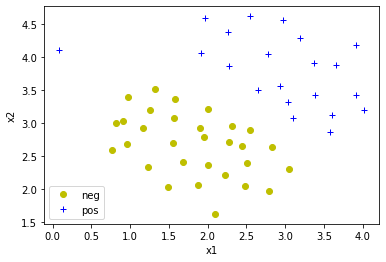

In [8]:
#绘图
plot_data(X, y)

In [9]:
# 训练支持向量机 参数C=1
clf = SVC(C=1, kernel='linear') 
clf.fit(X, y)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Text(0.5, 1.0, 'C=1')

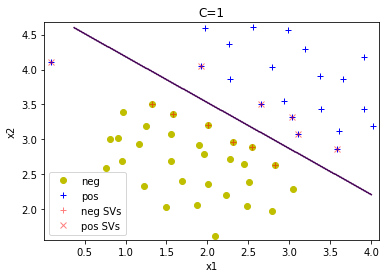

In [10]:
plot_data(X, y)
plot_boundary(X, clf)
plot_support_vectors(clf)
plt.title('C=1')

In [11]:
# 训练支持向量机 C=100
clf = SVC(C=100, kernel='linear')
clf.fit(X, y)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Text(0.5, 1.0, 'C=100')

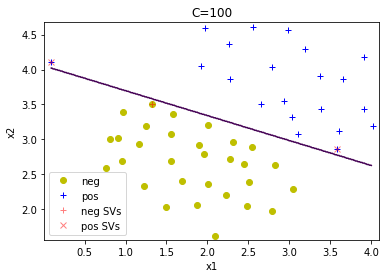

In [12]:
plot_data(X, y)
plot_boundary(X, clf)
plot_support_vectors(clf)
plt.title('C=100')

In [13]:
# 支持向量机--高斯核
data = sio.loadmat('.\data\ex6\ex6data2.mat')

In [14]:
X = data['X']
y = data['y'].ravel()

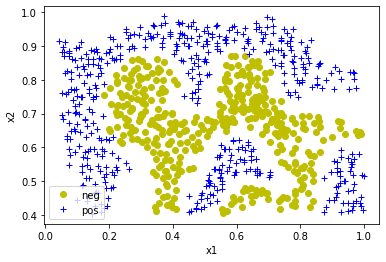

In [15]:
plot_data(X, y)

In [16]:
clf = SVC(C=1, kernel='rbf', gamma=100)
clf.fit(X, y)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Text(0.5, 1.0, 'C=1, gamma=100')

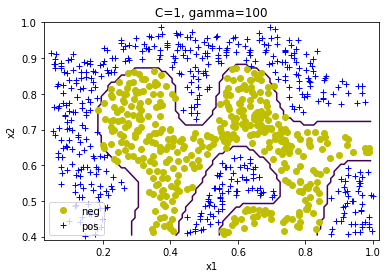

In [17]:
plot_data(X, y)
plot_boundary(X, clf)
plt.title('C=1, gamma=100')